In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit,cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%pylab inline
style.use('ggplot')

c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Populating the interactive namespace from numpy and matplotlib


In [2]:
df1 = pd.read_csv('Mapped_Final.csv',index_col=False,usecols=['News_Label','Twitt_Label','Volume','High'])
print(df1.describe())
df1.head(15)

         News_Label   Twitt_Label          High        Volume
count  32418.000000  32418.000000  32418.000000  32418.000000
mean       0.032667      0.073724   6350.714386      2.228470
std        0.214564      0.263910     66.495662     12.354142
min       -1.000000     -2.000000   6181.540000      0.000000
25%        0.000000      0.000000   6280.490000      0.002718
50%        0.000000      0.000000   6385.010000      0.082848
75%        0.000000      0.000000   6403.750000      1.076639
max        1.000000      1.000000   6676.170000    350.203804


,News_Label,Twitt_Label,High,Volume
0,0,0,6394.18,0.005533
1,0,0,6394.18,0.005533
2,0,0,6394.18,0.005533
3,0,0,6394.18,0.005533
4,0,0,6394.18,0.005533
5,0,0,6394.18,0.005533
6,0,0,6394.18,0.005533
7,0,0,6394.18,0.005533
8,0,0,6394.18,0.005533
9,0,0,6394.18,0.005533


In [3]:
# print(df1.tail())
# df1.drop(df1.tail(1).index,inplace=True)
y1 = pd.read_csv('Mapped_Final_Output.csv',index_col=False,usecols=['High'])
y1.head()
# y1.drop(y1.head(1).index,inplace=True)

,High
0,6394.98
1,6394.98
2,6394.98
3,6394.98
4,6394.98


In [4]:
def display(reg,Y_train,Y_test,Y_predict,X_train):
    print(reg.feature_importances_)
    feature_imp = pd.Series(reg.feature_importances_,index=X_train.columns)
    feature_imp.plot(kind='barh',figsize=(7,6))
    print("Mean absolute error :",metrics.mean_absolute_error(Y_test,Y_predict))
    print("Mean squared error :",metrics.mean_squared_error(Y_test,Y_predict))
    print("Root mean square error :",np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)),"\n")
    
    y_oob = reg.oob_prediction_
#     print("C stat :",metrics.roc_auc_score(Y_train,y_oob))

In [5]:
def fit_model(df,y):
    X_train,X_test,Y_train,Y_test = train_test_split(df,y,test_size = 0.3)
#     train_size = int(len(df)*0.7)
#     test_size = int(len(df)*0.3)
#     print(train_size,test_size)
#     X_train,Y_train,X_test,Y_test = df[0:train_size],y[0:train_size],df[train_size:len(df1)],y[train_size:len(df1)]
    reg = RandomForestRegressor(n_estimators=1000,oob_score=True)
    reg.fit(X_train,Y_train)
    Y_predict = reg.predict(X_test)
    print('Cross validation on training data,',reg.score(X_train,Y_train))
    print('Cross validation on testing data,',reg.score(X_test,Y_test))
    
    display(reg,Y_train,Y_test,Y_predict,X_train)
    return reg,X_train,Y_train,Y_test,Y_predict

## High value

c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Cross validation on training data, 0.9939873643535349
Cross validation on testing data, 0.9619214986932788
[0.00297968 0.00501111 0.77213939 0.21986982]
Mean absolute error : 2.49515068866704
Mean squared error : 165.56103652529416
Root mean square error : 12.867052363509451 

[0.55154604 0.19245872 0.36289804 0.1836095  0.20050748]


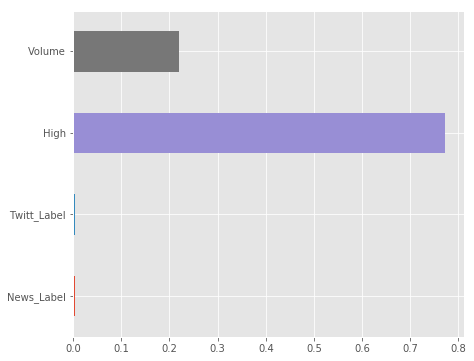

In [6]:
reg,X_train,Y_train,Y_test,Y_predict = fit_model(df1,y1)

# X_train = df1[0:,:],
# print(X_train)
scores = cross_val_score(reg,df1,y1.values.ravel(),cv = 5)
print(scores)
# for i in range(10):
#     reg,Y_test,Y_predict = fit_model(df,y1)
#     print(np.mean(Y_predict))
# np.unique(Y_predict[1])
# print(reg.oob_score_)

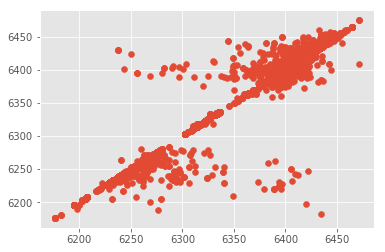

In [7]:
plt.scatter(Y_predict,Y_test)

In [8]:
Y_test.reset_index(inplace=True,drop=True)
print(Y_predict[0:10])
print(Y_test.head(10))

[6309.49       6364.         6446.08       6364.         6369.99
 6404.0724084  6398.93826003 6364.         6419.42       6365.        ]
      High
0  6309.49
1  6364.00
2  6446.08
3  6364.00
4  6369.99
5  6404.26
6  6399.57
7  6364.00
8  6419.42
9  6365.00


Text(0.5, 0, 'Level')

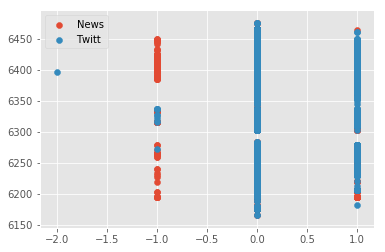

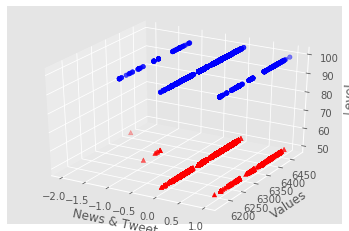

In [9]:
#Input volume and twitt relation with output
plt.scatter(X_train.News_Label,Y_train.High,label = "News")
plt.scatter(X_train.Twitt_Label,Y_train.High, label = "Twitt")
plt.legend()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train.News_Label, Y_train.High,100, c='b', marker='o')
ax.scatter(X_train.Twitt_Label,Y_train.High,50,c = 'r',marker = '^')
ax.set_xlabel("News & Tweet")
ax.set_ylabel("Values")
ax.set_zlabel("Level")

Text(0, 0.5, 'Testing')

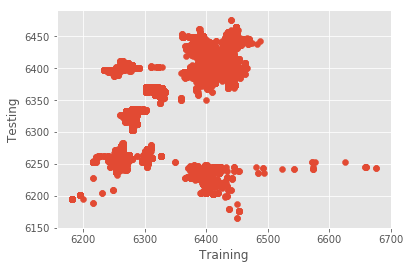

In [9]:
#Historical with output
plt.scatter(X_train.High,Y_train.High)
plt.xlabel("Training")
plt.ylabel("Testing")

In [11]:
print(Y_predict[0:10])
print(Y_test.head(10))

[6195.     6368.29   6381.11   6259.43   6263.67   6368.29   6410.01
 6301.5399 6365.     6407.2349]
      High
0  6195.00
1  6368.29
2  6405.60
3  6259.43
4  6263.67
5  6368.29
6  6410.01
7  6397.95
8  6365.00
9  6408.67


In [10]:
#Error = Experimental - Theoretical / Theoretical
# print(len(Y_test),len(Y_predict))
temp1 = sum([np.abs(y-x)/y for x,y in zip(Y_predict,Y_test.as_matrix())])
print(temp1 * 100 / len(Y_test))
print(np.abs(np.mean(Y_predict) - np.mean(Y_test.as_matrix())) * 100 / np.mean(Y_test.as_matrix()))

0.03933891632817804
0.0018716291982792419


c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


       High    Predicted
0   6309.49  6309.490000
1   6364.00  6364.000000
2   6446.08  6446.080000
3   6364.00  6364.000000
4   6369.99  6369.990000
5   6404.26  6404.072408
6   6399.57  6398.938260
7   6364.00  6364.000000
8   6419.42  6419.420000
9   6365.00  6365.000000
10  6275.45  6275.450610
11  6259.44  6259.440000
12  6399.82  6399.820000
13  6263.67  6263.670000
14  6256.76  6256.873230
15  6404.93  6404.993040
16  6263.67  6263.670000
17  6263.67  6263.670000
18  6263.67  6263.670000
19  6246.12  6246.120000


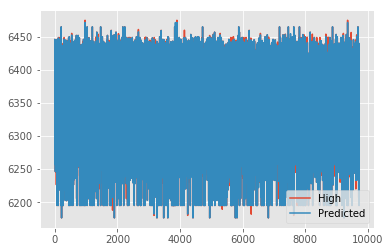

In [11]:
Y_test['Predicted'] = Y_predict
print(Y_test.head(20))
Y_test.plot()
plt.show()

In [12]:
Y_test.describe()

,High,Predicted
count,9726.000000,9726.000000
mean,6357.608756,6357.727747
std,65.941902,64.663830
min,6176.210000,6176.210000
25%,6317.980000,6317.980000
50%,6385.950000,6385.300000
75%,6405.000000,6404.589396
max,6474.980000,6471.524096


## Open value

In [18]:
df2 = pd.read_csv('Mapped_31_oct.csv',index_col=False,usecols=['News_Label','Twitt_Label','Volume','Open'])
df2.head()
y2 = pd.read_csv('Mapped.csv',index_col=False,usecols=['Open'])
y2.head()

,Open
0,6256.56
1,6256.76
2,6256.56
3,6256.56
4,6256.56


c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.00239983 0.01383639 0.67324528 0.3105185 ]
Mean absolute error : 0.30665967206044614
Mean squared error : 0.8692541597061757
Root mean square error : 0.9323380072195789 



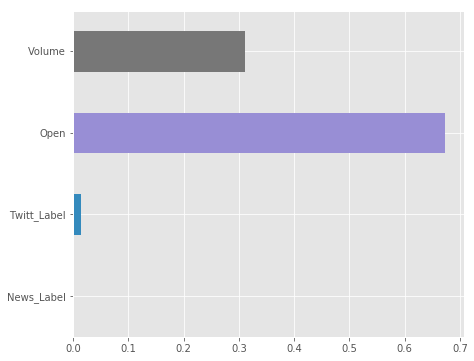

In [19]:
reg,X_train,Y_train,Y_test,Y_predict = fit_model(df2,y2)

In [20]:
#Error = Experimental - Theoretical / Theoretical
# print(len(Y_test),len(Y_predict))
temp1 = sum([np.abs(y-x)/y for x,y in zip(Y_predict,Y_test.as_matrix())]) #Mean absolute percentage error
print(temp1 * 100 / len(Y_test))
print(np.abs(np.mean(Y_predict) - np.mean(Y_test.as_matrix())) * 100 / np.mean(Y_test.as_matrix()))

0.0048946730344483136
0.0007070661723589831


      Open  Predicted
0  6271.89  6271.6686
1  6267.25  6267.2500
2  6264.94  6265.1035
3  6264.54  6264.5400
4  6269.04  6268.5591


c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


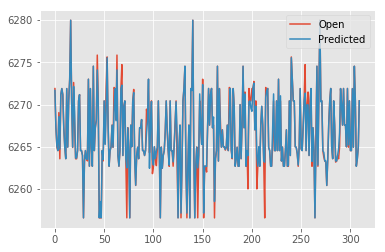

In [21]:
Y_test.reset_index(inplace=True,drop=True)
Y_test['Predicted'] = Y_predict
print(Y_test.head())
Y_test.plot()
plt.show()